<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/auto/Scraping/3_Selenium_y_xpath/scraping_por_automatizacion_solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" data-canonical-src="https://colab.research.google.com/assets/colab-badge.svg"></a>

# **Scraping por automatización** 

## **XPath (XML Path Language)**

Un selector muy utilizado es el [**Xpath**](https://es.wikipedia.org/wiki/XPath), basado en un lenguaje diseñado para localizar elementos en un archivo XML o HTML.

Es una manera de recorrer un árbol como por ejemplo el DOM (*document object model*).

Por ejempllo si vamos a la [página del Instituto Humai](https://ihum.ai/) y presionamos `f12` veremos esto:

<img src="https://i.ibb.co/cNM04jP/copy-xpath.png" alt="copy-xpath" width="1000">

Existen dos maneras de acceder a un elemento usando Xpath:

### XPath absoluto
* Contiene la ruta completa desde el elemento raiz hasta el elemento de interes. <br> Ejemplo: `/html/body/section[2]/div[2]/a[2]/div/div[1]/img`
  * Contra: Cualquier cambio en la ruta del elemento hace que ya no se acceda de esa forma.

### XPath relativo
* Comienza haciendo referencia al elemento que queremos ubicar en relación con una ubicación particular. Esto significa que el elemento está posicionado con relación a su posición normal. <br> Ejemplo: 
`//*[@id="que-hacemos-a-tag"]/div/div[1]/img`
  * Cualquier cambio en el diseño de la página o la jerarquía DOM tendrá un impacto mínimo (o nulo) en el selector XPath existente.
  * Su estructura básica es la siguiente: <br>
  <font size=6>
  <center>
  <font color='red'>//</font><font color='blue'>nombreDelTag</font>[@<font color='green'>Atributo</font>=<font color='purple'>"valor"</font>]
</center>
<font>

### Seleccion de nodos desconocidos

* El asterisco (**\***) o *wildcard* sirve como reemplazo para el nombre del tag, funcionando como comodín para cualquiera de ellos. <br>
Ejemplo: `//*[@id="soy_un_div"]`


* El arroba seguido de asterisco (**\@***) *matchea* cualquier atributo de un elemento. <br>
Ejemplo: `//h2[@*="soy_un_subtitulo"]`

### Algunas funciones

* `contains()` permite ver si un elemento contiene una *string* en particular. No es necesario que sea match exacto, sino que forme parte de la *string*.<br>
Ejemplo: `//div[contains(@class,"que")]`

* ` text() ` nos permite obtener un elemento en base al texto que tiene dentro del tag <br>
Ejemplo: `//*[text()="SABER MÁS"]`

Tambien los podriamos usar juntos: `//*[contains(text(),"SABER")]` 🤯




**Hay mucho mucho más!** <br>

Xpath cheatsheet super completa: https://www.lambdatest.com/blog/most-exhaustive-xpath-locators-cheat-sheet/



## **Robots que controlan nuestro navegador** 🦾

A veces los sitios webs tienen ciertas características que hacen que los métodos que venimos utilizando no funcionen.

En esos casos uno puede intentar desarrollar una especie de robot que controle nuestro navegador interactuando con internet de igual forma que lo hace un humano. Hay una herramienta llamada __Selenium__ que puede utilizarse exactamente para eso.


### ¿Como se hace para programar un robot para que utilice un sitio web?

Lo principal es saber como localizar un elemento en la pagina.
Selenium nos permite hacerlo de diversas formas (id, tag, clase, selector de CSS, etc)

## **Web scraping avanzado con Selenium**

<img src="https://selenium-python.readthedocs.io/_static/logo.png" alt="selenium-logo">

### ¿Qué es Selenium?
* Es una herramienta de testing y automatización que tiene una API para Python (entre otros lenguajes)

* No fue pensado específicamente para web scraping ni web crawling, pero gracias al sistema cliente/servidor Web Driver permite utilizar un navegador de forma local o en remoto.
Esto nos da acceso a un navegador con el que podemos recorrer la web.

### ¿En qué casos podria resultarnos util?
* Páginas dinámicas (por ej: [AJAX](https://developer.mozilla.org/es/docs/Web/Guide/AJAX), [lazy loading](https://developer.mozilla.org/en-US/docs/Web/Performance/Lazy_loading))
* Scrolleo infinito
* Completar formularios, autenticación, pop ups, manejo de sesiones, ¿captchas?,  etc  ...

* va a permitirnos recorrer internet con un navegador "virtual", permitiéndonos hacer click, scroll, etc.

* En Google Colab solo podremos usarlo sin interfaz grafica (*headless*).


Si podemos ver esa informacion en el navegador, deberiamos poder *scrapearla*.

- Documentacion oficial: https://www.selenium.dev/documentation/
- Documentacion no oficial pero recomendada: https://selenium-python.readthedocs.io/



## **Hola mundo con Selenium: Buscar en google**

Veamos un poco como se usa esta nueva herramienta.

La base de Selenium (y un poco del web scraping en general) es la selección de elementos en la web. Para esto nos provee varios métodos:

* *find_element_by_id*
* *find_element_by_name*
* *find_element_by_xpath*
* *find_element_by_link_text*
* *find_element_by_partial_link_text*
* *find_element_by_tag_name*
* *find_element_by_class_name*
* *find_element_by_css_selector*

Para aprender más: https://selenium-python.readthedocs.io/locating-elements.html

### Instalación y configuración

In [ ]:
# Ver https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com

# Instalación de dependencias en la compu que nos presta Google
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

options = webdriver.ChromeOptions() # Usamos chrome, se podria usar otro.
options.add_argument('--headless') # Chromium sin interfaz grafica
options.add_argument('--no-sandbox') # Seguridad
options.add_argument('--disable-dev-shm-usage') # configuracion de linux
options.add_argument('--user-agent=""Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36""') # user agent

driver = webdriver.Chrome('chromedriver',options=options)

In [3]:
# Instanciamos el webdriver
driver = webdriver.Chrome('chromedriver',options=options)

url = 'http://google.com/'

# Hacemos que vaya a la url
driver.get(url)

In [4]:
# Buscamos la palabra 'Python'
input = driver.find_element_by_xpath('//input[1]')
input.send_keys("humai inteligencia artificial" + Keys.ENTER)

# # boton de imagenes
# driver.find_element_by_xpath('//*[@id="hdtb-msb"]/div[1]/div/div[2]/a').click()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  


In [5]:
# Podemos sacar una captura de pantalla 
driver.save_screenshot(f'screenshot1.png')

True

In [6]:
driver.close()

## **Caso de uso Nº 1: Scroll infinito**

Existen páginas que no muestran todo el contenido a menos que vayamos hasta abajo (*scroll*). Esta acción dispara un evento de javascript que renderiza más HTML y por lo tanto vemos contenido nuevo.

Podemos emular la acción de mediante Selenium.

In [7]:
# Configuramos el web driver
driver = webdriver.Chrome('chromedriver',options=options)

# Hacemos el pedido a la URL
url = "https://infinite-scroll.com/demo/full-page/" 
driver.get(url)

# Busco todos los h2 (notar la sutileza del metodo elements con la 's' al final)
h2_list = driver.find_elements_by_css_selector("h2")
for h2 in h2_list:
  print(h2.text)

1a - Infinite Scroll full page demo
1b - RGB Schemes logo in Computer Arts


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  if __name__ == '__main__':


Ahora veamos si obtenemos los mismos `h2` si utilizamos selenium para hacer *scroll*

In [8]:
driver.save_screenshot(f'infinite_page.screenshot.png')

# Hago lo mismo que antes pero iterando 5 veces y pidiendole que scrollee hasta el final cada vez y saque un screenshot
for i in range(5):
  print(f'Iteracion numero {i+1}\n\n')
  driver.save_screenshot(f'infinite_page_{i+1}.screenshot.png')
  # el metodo execute_script me permite ejecutar codigo de javascript, en este caso para ir al final de la pagina
  driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") 
  h2_list = driver.find_elements(By.CSS_SELECTOR, 'h2')
  for h2 in h2_list:
    print(h2.text)
  print('\n\n')

Iteracion numero 1


1a - Infinite Scroll full page demo
1b - RGB Schemes logo in Computer Arts



Iteracion numero 2


1a - Infinite Scroll full page demo
1b - RGB Schemes logo in Computer Arts
2a - RGB Schemes logo
2b - Masonry gets horizontalOrder
2c - Every vector 2016



Iteracion numero 3


1a - Infinite Scroll full page demo
1b - RGB Schemes logo in Computer Arts
2a - RGB Schemes logo
2b - Masonry gets horizontalOrder
2c - Every vector 2016
3a - Logo Pizza delivered
3b - Some CodePens
3c - 365daysofmusic.com
3d - Holograms
4a - Huebee: 1-click color picker
4b - Word is Flickity is good



Iteracion numero 4


1a - Infinite Scroll full page demo
1b - RGB Schemes logo in Computer Arts
2a - RGB Schemes logo
2b - Masonry gets horizontalOrder
2c - Every vector 2016
3a - Logo Pizza delivered
3b - Some CodePens
3c - 365daysofmusic.com
3d - Holograms
4a - Huebee: 1-click color picker
4b - Word is Flickity is good



Iteracion numero 5


1a - Infinite Scroll full page demo
1b - RGB Schem

In [9]:
driver.quit()

## **Caso de uso Nº 2: Páginas que usan JavaScript para mostrar el contenido de manera asíncrona**

* Hay páginas que cuando hacemos un request a su URL no nos devuelve lo que esperamos. Sino bastante código de JavaScript (entre etiquetas `<script>`)

* En esos casos hay que esperar un tiempo y/o interactuar con la pagina.

Ejemplo: http://www.parrocchiemap.it/parrocchiemap/ricerca_pm.jsp?diocesi=Milano&idzonapastoraler=296



In [10]:
options = webdriver.ChromeOptions() # Usamos chrome, se podria usar otro.
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

idzonapastorale_value = []
idzonapastorale_text = []

driver = webdriver.Chrome('chromedriver',options=options)

url = "http://www.parrocchiemap.it/parrocchiemap/ricerca_pm.jsp?diocesi=Milano&idzonapastoraler=296"

# Hacemos el pedido a la URL
driver.get(url)

# Ejecuto codigo de javacript para ir al final de la pagina
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") 

# # Espero a que cargue la pagina
WebDriverWait(driver, timeout=5)


# El metodo Select nos permite acceder a las opciones en un menu desplegable (drop-down)
select = Select(driver.find_element_by_id('idzonapastorale'))
for item in select.options:
    print(item.get_attribute('innerText'), item.get_attribute('value')) 
    idzonapastorale_value.append(item.get_attribute('value'))
    idzonapastorale_text.append(item.get_attribute('innerText'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead


- -1
Zona Past. VII - Sesto S. Giovanni 296
Zona Pastorale I - Milano 292
Zona Pastorale II - Varese 295
Zona Pastorale III - Lecco 297
Zona Pastorale IV - Rho 294
Zona Pastorale V - Monza 293
Zona Pastorale VI - Melegnano 298


In [11]:
pagesource_list = []

diocesi = 'Milano' 
for zona in idzonapastorale_value:
  print(f'Mirando la zona: {zona}' )
  # Configuramos el web driver
  driver = webdriver.Chrome('chromedriver',options=options)
  idzonapastorale = zona
  url = f"http://www.parrocchiemap.it/parrocchiemap/ricerca_pm.jsp?diocesi={diocesi}&idzonapastoraler={idzonapastorale}" 

  # Hacemos el pedido a la URL
  driver.get(url)

  driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") 

  # # Espero a que cargue la pagina a la vieja usanza
  # time.sleep(10) 
  WebDriverWait(driver, timeout=5)

  # Cambio el driver para que este en el iframe
  driver.switch_to.frame(driver.find_element_by_tag_name("iframe"))

  # Una manera de quedarse con el HTML
  html = driver.execute_script("return document.getElementsByTagName('html')[0].innerHTML")

  # Otra manera usando el atributo del web driver
  pageSource = driver.page_source

  pagesource_list.append(pageSource)

  driver.save_screenshot(f'screenshot_{zona}.png')

Mirando la zona: -1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead


Mirando la zona: 296


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead


Mirando la zona: 292


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead


Mirando la zona: 295


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead


Mirando la zona: 297


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead


Mirando la zona: 294


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead


Mirando la zona: 293


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead


Mirando la zona: 298


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead


In [12]:
# Proceso los mails

import re

def procesar_mails(pagesource_list):

  mails_total = []

  for zona in pagesource_list:
    mails = []
    pos = []
    # obteniendo los mails
    match = re.findall(r'(mailto:\S+@\S+)', zona)
    
    for num, i in enumerate(match):
      pos.append(num)
      lista = i.split('+')
      mail = ''.join(lista[0][7:].replace("'", "")+lista[1].replace("'", "")+lista[2].replace("'", "")).split(',')[0].split(';')[0]
      mails.append(mail)

    mails_total.append(mails)

  return mails_total

mails_total = procesar_mails(pagesource_list)

In [13]:
# Armo un Pandas Dataframe en base al diccionario
import pandas as pd

diccionario_mails = dict()
df_list = [] 
for num, zona in enumerate(idzonapastorale_text[1:]):
   diccionario_mails[f'df{num+1}']= pd.DataFrame(mails_total[num+1], columns=[f'{zona}'])
   df_list.append(diccionario_mails[f'df{num+1}'])

df_final = pd.concat(df_list, axis=1)
df_final

,Zona Past. VII - Sesto S. Giovanni,Zona Pastorale I - Milano,Zona Pastorale II - Varese,Zona Pastorale III - Lecco,Zona Pastorale IV - Rho,Zona Pastorale V - Monza,Zona Pastorale VI - Melegnano
0,seggiano@chiesadimilano.it,segreteria@angelicustodimilano.com,boscovaltravaglia@chiesadimilano.it,albogasio@chiesadimilano.it,vittuone@chiesadimilano.it,peregallo@chiesadimilano.it,mombretto@chiesadimilano.it
1,lavanderie@chiesadimilano.it,annunciazione@chiesadimilano.it,cerrolagomaggiore@chiesadimilano.it,santamariahoe@chiesadimilano.it,turbigo@chiesadimilano.it,montesolaro@chiesadimilano.it,milanotre@chiesadimilano.it
2,ospitaletto@chiesadimilano.it,beatorosmini@chiesadimilano.it,crugnola@chiesadimilano.it,visino@chiesadimilano.it,sangiorgiosulegnano@chiesadimilano.it,novaassunta@chiesadimilano.it,parrocchiaincarnazione@fastwebnet.it
3,milanodue@chiesadimilano.it,addoloratainmorsenchio@chiesadimilano.it,carnisio@chiesadimilano.it,ballabiosuperiore@chiesadimilano.it,saronnosantuario@chiesadimilano.it,baruccana@chiesadimilano.it,robbianodimediglia@chiesadimilano.it
4,dta123.vimodrone@gmail.com,addoloratainsansiro@chiesadimilano.it,casoratesempione@chiesadimilano.it,morterone@chiesadimilano.it,castellettodisenago@chiesadimilano.it,binzago@chiesadimilano.it,borgoest@chiesadimilano.it
...,...,...,...,...,...,...,...
228,NaN,NaN,castronno@chiesadimilano.it,NaN,NaN,NaN,NaN
229,NaN,NaN,samarate@chiesadimilano.it,NaN,NaN,NaN,NaN
230,NaN,NaN,sansalvatore@chiesadimilano.it,NaN,NaN,NaN,NaN
231,NaN,NaN,capolago@chiesadimilano.it,NaN,NaN,NaN,NaN


In [14]:
# Pasamos el dataframe a formato csv
df_final.to_csv()

',Zona Past. VII - Sesto S. Giovanni,Zona Pastorale I - Milano,Zona Pastorale II - Varese,Zona Pastorale III - Lecco,Zona Pastorale IV - Rho,Zona Pastorale V - Monza,Zona Pastorale VI - Melegnano\n0,seggiano@chiesadimilano.it,segreteria@angelicustodimilano.com,boscovaltravaglia@chiesadimilano.it,albogasio@chiesadimilano.it,vittuone@chiesadimilano.it,peregallo@chiesadimilano.it,mombretto@chiesadimilano.it\n1,lavanderie@chiesadimilano.it,annunciazione@chiesadimilano.it,cerrolagomaggiore@chiesadimilano.it,santamariahoe@chiesadimilano.it,turbigo@chiesadimilano.it,montesolaro@chiesadimilano.it,milanotre@chiesadimilano.it\n2,ospitaletto@chiesadimilano.it,beatorosmini@chiesadimilano.it,crugnola@chiesadimilano.it,visino@chiesadimilano.it,sangiorgiosulegnano@chiesadimilano.it,novaassunta@chiesadimilano.it,parrocchiaincarnazione@fastwebnet.it\n3,milanodue@chiesadimilano.it,addoloratainmorsenchio@chiesadimilano.it,carnisio@chiesadimilano.it,ballabiosuperiore@chiesadimilano.it,saronnosantuario@chi

## **Caso de uso Nº 3: Alertas, prompts y confirmaciones**

La idea es aprender como lidiar con distintos tipos de ventanas emergentes que pueden aparecer mientras nuestro scrapper está funcionando.

alerta simple de javascript

In [25]:
driver = webdriver.Chrome('chromedriver',options=options)

url = "https://www.selenium.dev/documentation/webdriver/js_alerts_prompts_and_confirmations/" 

# Hacemos el pedido a la URL
driver.get(url)

In [35]:
from IPython import display
from base64 import b64decode

def print_screen():
  return display.Image(b64decode(driver.get_screenshot_as_base64()))

In [17]:
  # Click para activar al alerta
driver.find_element_by_xpath('//a[text() = "See an example alert"]').click()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  


In [18]:
# Wait for the alert to be displayed and store it in a variable
WebDriverWait(driver, 10).until(EC.alert_is_present())
alert = driver.switch_to.alert

print('Texto de la alerta: ', alert.text)

# Aceptamos
alert.accept()

Texto de la alerta:  Sample alert


Caja de confirmacion

In [19]:
# Hacemos el pedido a la URL
driver.get(url)

# Click para activar al alerta
driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/main/div/p[4]/a').click()

# Wait for the alert to be displayed and store it in a variable
WebDriverWait(driver, 10).until(EC.alert_is_present())
alert = driver.switch_to.alert

print('Texto de la alerta: ', alert.text)

# para cancelar
alert.dismiss()

Texto de la alerta:  Are you sure?


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  """


Prompt

Son como las cajas de confirmacion pero tiene un input para texto

In [26]:
# Hacemos el pedido a la URL
driver.get(url)

# Click para activar al alerta
driver.find_element_by_xpath('/html/body/div/div[1]/div/main/div/p[6]/a').click()

# Wait for the alert to be displayed and store it in a variable
WebDriverWait(driver, 10).until(EC.alert_is_present())
alert = driver.switch_to.alert

print('Texto de la alerta: ', alert.text)

# Mensaje
alert.send_keys("Python, obvio")

# Apretamos OK
alert.accept()

Texto de la alerta:  What is your tool of choice?


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  """


In [27]:
driver.quit()

## **Ejemplo real: Spotify 🎵**

Veamos como podemos extraer datos

In [28]:
driver = webdriver.Chrome('chromedriver',options=options)

url = 'https://open.spotify.com/'

# Hacemos el pedido a la URL
driver.get(url)
driver.save_screenshot(f'Spotify0.png')

#Scroll
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") 

In [31]:
xpath_lista = "//div[@data-testid = 'card-click-handler']"

# podemos esperar a que un elemento sea "clickeable" antes de darla la orden de hacer click
driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, xpath_lista))))

In [32]:
driver.save_screenshot(f'Spotify1.png')

True

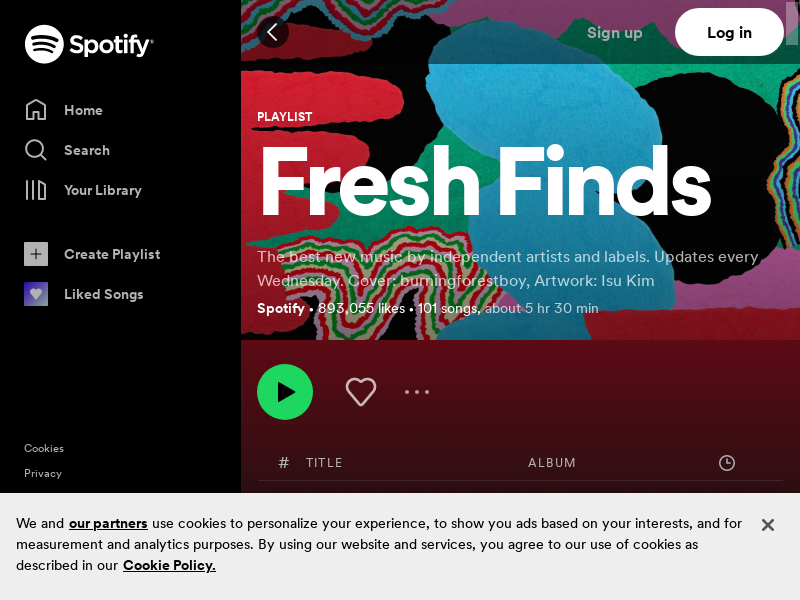

In [39]:
display.Image(b64decode(driver.get_screenshot_as_base64()))

In [44]:
driver.current_url

'https://open.spotify.com/playlist/37i9dQZF1DWWjGdmeTyeJ6'

In [52]:
from selenium.webdriver.common.by import By

def element_text(xpath):
    element = driver.find_element(By.XPATH, value=xpath)
    return element.text

title_xpath = '//h1[text()]'
title = element_text(title_xpath)
print(f"Nombre de la lista: {title}")

likes_xpath = '//span[contains(text(), "likes")]'
likes = element_text(likes_xpath)
print(f"Cantidad de likes: {likes}")

Nombre de la lista: Fresh Finds
Cantidad de likes: 893,055 likes


In [ ]:
driver.close()

### Ejercicio
Descargar también la duración de la playlist

In [54]:
def duracion():
  duracion_xpath = '//span[contains(text(), "min") or contains(text(), "hr")]'
  duracion = element_text(duracion_xpath)
  print(duracion)

duracion()

about 5 hr 30 min


## Ejemplo 3: Spotify

Veamos como descargar mayores cantidades de datos y recorrer un sitio web

In [55]:
driver = webdriver.Chrome('chromedriver',options=options)

url = 'https://open.spotify.com/genre/sleep'

driver.get(url)

In [61]:
#Scroll
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") 

# Obtenemos los elementos 
playlists_elements = driver.find_elements(By.XPATH, value="//div[@data-testid='grid-container']//a[@href]")
playlists_links = [playlist.get_attribute("href") for playlist in playlists_elements]
playlists_links

['https://open.spotify.com/playlist/37i9dQZF1DWZd79rJ6a7lp',
 'https://open.spotify.com/playlist/37i9dQZF1DWYcDQ1hSjOpY',
 'https://open.spotify.com/playlist/37i9dQZF1DXbcPC6Vvqudd']

### Ejercicio
Completar el siguiente código

In [ ]:
for url in playlists_links:
    # Obtener e imprimir el titulo y likes de cada playlist
    # Utilizar un try catch por si alguna playlist falla.
    # Para así no frenar todo el procesamiento por una playlist
    try: 
      driver.get(url)
      print("\n ############")
      title_xpath = ''
      title = element_text(title_xpath)
      print(f"Nombre de la lista: {title}")
      likes_xpath = ''
      likes = element_text(likes_xpath)
      print(f"Cantidad de likes: {likes}")
      duracion_xpath = ''
      duracion = element_text(duracion_xpath)
      print(f"Duracion de la playlist: {duracion}")
      print("############")

    except:
      pass


driver.close()


## Recursos útiles

### Libros

* [Web Scraping with Python, 2nd Edition](https://www.oreilly.com/library/view/web-scraping-with/9781491985564/)
  * [Código asociado al libro](https://github.com/REMitchell/python-scraping)
* [Hands-On Web Scraping with Python](https://www.amazon.com/Hands-Web-Scraping-Python-operations-ebook/dp/B07VFFYPGK)

### Videos

* [Selenium FULL COURSE - Learn Selenium by creating a bot in 3 hours [2021]](https://youtu.be/6gxhcvrf2Jk)
* [Hide Selenium Automation](https://piprogramming.org/articles/How-to-make-Selenium-undetectable-an(d-stealth--7-Ways-to-hide-your-Bot-Automation-from-Detection-0000000017.html)